In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
import random

In [2]:
df = pd.read_csv('merged_file_final260122.csv')

In [3]:
to_drop = ['image_id', 'Facebook Id', 'Page Category', 'Page Name', 'Page Description', 'Page Created', 'Post Created',
           'Post Created Date', 'Type', 'Love', 'Wow', 'Haha', 'Sad', 'Angry' , 'Care',
           'Video Share Status', 'Is Video Owner?', 'Post Views', 'Total Views', 'Total Views For All Crossposts', 
           'Video Length', 'URL', 'Message', 'Link', 'Final Link', 'Image Text', 'Link Text', 'Description', 'Sponsor Id', 
           'Sponsor Name', 'Sponsor Category', 'Likes', 'Comments', 'Shares','User Name', 'Page Admin Top Country', 'Likes at Posting', 'Post Created Time',
           'Overperforming Score (weighted  —  Likes 1x Shares 1x Comments 1x Love 1x Wow 1x Haha 1x Sad 1x Angry 1x Care 1x )']
#'Likes', 'Comments', 'Shares', 'Likes at Posting'

df = df.drop(to_drop, axis=1)
df = df.dropna()
df

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,...,Total Interactions,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,1,1,0,1,1,0,0,0,0,green,...,127,HIGH,0,0,0,0,0,1,0,0
1,0,1,1,1,2,1,0,0,0,blue,...,312,HIGH,0,0,0,0,0,1,0,0
2,0,1,1,1,2,0,0,0,1,grey,...,77,HIGH,0,0,0,0,0,1,0,0
3,0,1,0,1,1,0,0,0,0,purple,...,332,HIGH,0,1,0,0,0,0,0,0
4,1,1,1,0,1,0,0,0,0,grey,...,71,HIGH,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,1,1,1,1,2,0,0,0,0,cyan,...,269,HIGH,0,1,0,0,0,1,0,0
2566,0,0,0,0,0,1,0,0,0,blue,...,211,LOW,0,0,0,0,0,0,0,0
2567,0,1,1,1,2,0,0,0,0,cyan,...,162,HIGH,0,1,0,0,0,0,0,0
2568,1,1,0,1,2,0,0,0,0,grey,...,133,HIGH,0,1,0,0,0,0,1,0


In [4]:
def change_types(df):
    df['Followers at Posting'] = df['Followers at Posting'].astype('int64')
    df['Child'] = df['Child'].astype('int64')
    df['Smile'] = df['Smile'].astype('int64')
    df['Female'] = df['Female'].astype('int64')
    df['Male'] = df['Male'].astype('int64')
    df['PeopleNumber'] = df['PeopleNumber'].astype('int64')
    df['Text'] = df['Text'].astype('int64')
    df['close_up'] = df['close_up'].astype('int64')
    df['Indoors'] = df['Indoors'].astype('int64')
    df['Outdoors'] = df['Outdoors'].astype('int64')
    
    df['LOGO'] = df['LOGO'].astype('bool')
    df['ANGRY'] = df['ANGRY'].astype('bool')
    df['CALM'] = df['CALM'].astype('bool')
    df['CONFUSED'] = df['CONFUSED'].astype('bool')
    df['DISGUSTED'] = df['DISGUSTED'].astype('bool')
    df['FEAR'] = df['FEAR'].astype('bool')
    df['HAPPY'] = df['HAPPY'].astype('bool')
    df['SAD'] = df['SAD'].astype('bool')
    df['SURPRISED'] = df['SURPRISED'].astype('bool')
    return df

In [5]:
df = change_types(df)

In [6]:
df.dtypes

Child                    int64
Smile                    int64
Female                   int64
Male                     int64
PeopleNumber             int64
Text                     int64
close_up                 int64
Indoors                  int64
Outdoors                 int64
dominantColor           object
LOGO                      bool
Followers at Posting     int64
Total Interactions       int64
Contrast                object
ANGRY                     bool
CALM                      bool
CONFUSED                  bool
DISGUSTED                 bool
FEAR                      bool
HAPPY                     bool
SAD                       bool
SURPRISED                 bool
dtype: object

In [7]:
df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,Followers at Posting,Total Interactions
count,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0,2500.0
mean,0.4,0.8,0.7,0.4,1.2,0.2,0.0,0.1,0.1,8070202.2,74754.6
std,0.5,0.4,0.5,0.5,0.7,0.4,0.1,0.2,0.3,12171064.1,387478.2
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7233.0,5.0
25%,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,138347.2,135.0
50%,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,865509.5,288.0
75%,1.0,1.0,1.0,1.0,2.0,0.0,0.0,0.0,0.0,26164014.0,4240.0
max,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,29486754.0,5750308.0


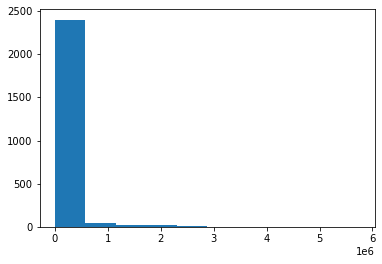

In [8]:
plt.hist(df['Total Interactions'], bins=10)
plt.show()

In [9]:
new_df = df[df['Total Interactions'] < df['Total Interactions'].quantile(0.90)]
# new_df = df[(df['Total Interactions'] < df['Total Interactions'].quantile(0.80)) & (df['Total Interactions'] > df['Total Interactions'].quantile(0.20))]
# plt.hist(new_df['Total Interactions'])

In [10]:
new_df.describe().apply(lambda s: s.apply('{0:.1f}'.format))

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,Followers at Posting,Total Interactions
count,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0,2250.0
mean,0.4,0.8,0.7,0.4,1.2,0.3,0.0,0.1,0.1,5904733.4,2043.8
std,0.5,0.4,0.5,0.5,0.7,0.4,0.1,0.2,0.3,10843759.2,4203.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7233.0,5.0
25%,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,136067.2,121.0
50%,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,396180.0,252.5
75%,1.0,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1957430.8,640.5
max,1.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,29486754.0,21212.0


In [11]:
df[df['Total Interactions']>100000].count()

Child                   148
Smile                   148
Female                  148
Male                    148
PeopleNumber            148
Text                    148
close_up                148
Indoors                 148
Outdoors                148
dominantColor           148
LOGO                    148
Followers at Posting    148
Total Interactions      148
Contrast                148
ANGRY                   148
CALM                    148
CONFUSED                148
DISGUSTED               148
FEAR                    148
HAPPY                   148
SAD                     148
SURPRISED               148
dtype: int64

In [12]:
y = new_df['Total Interactions']
y = (y/new_df['Followers at Posting'])*1000
y

0       1.739321
1       4.263926
2       1.051539
3       4.525442
4       0.967250
          ...   
2565    1.760828
2566    1.379175
2567    1.055932
2568    0.856490
2569    0.594462
Length: 2250, dtype: float64

C:\Users\User\anaconda3\envs\Diplomatiki\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    2250.000000
mean        1.469823
std         3.565633
min         0.004986
25%         0.239178
50%         0.561206
75%         1.417269
max        72.325603
dtype: float64

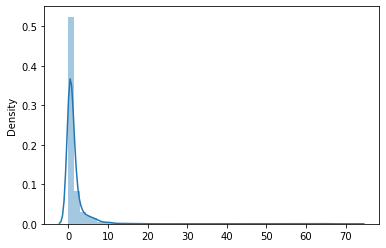

In [13]:
sns.distplot(y)
y.describe()

In [14]:
y[y<y.mean()].count()

1712

In [15]:
X = new_df.drop(['Total Interactions','Followers at Posting'], axis=1)
X

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,LOGO,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,1,1,0,1,1,0,0,0,0,green,False,HIGH,False,False,False,False,False,True,False,False
1,0,1,1,1,2,1,0,0,0,blue,False,HIGH,False,False,False,False,False,True,False,False
2,0,1,1,1,2,0,0,0,1,grey,False,HIGH,False,False,False,False,False,True,False,False
3,0,1,0,1,1,0,0,0,0,purple,False,HIGH,False,True,False,False,False,False,False,False
4,1,1,1,0,1,0,0,0,0,grey,False,HIGH,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,1,1,1,1,2,0,0,0,0,cyan,True,HIGH,False,True,False,False,False,True,False,False
2566,0,0,0,0,0,1,0,0,0,blue,True,LOW,False,False,False,False,False,False,False,False
2567,0,1,1,1,2,0,0,0,0,cyan,True,HIGH,False,True,False,False,False,False,False,False
2568,1,1,0,1,2,0,0,0,0,grey,True,HIGH,False,True,False,False,False,False,True,False


In [16]:
X = pd.get_dummies(data=X)
X.head()
print(X.columns)
X

Index(['Child', 'Smile', 'Female', 'Male', 'PeopleNumber', 'Text', 'close_up',
       'Indoors', 'Outdoors', 'LOGO', 'ANGRY', 'CALM', 'CONFUSED', 'DISGUSTED',
       'FEAR', 'HAPPY', 'SAD', 'SURPRISED', 'dominantColor_blue',
       'dominantColor_brown', 'dominantColor_cyan', 'dominantColor_green',
       'dominantColor_grey', 'dominantColor_orange', 'dominantColor_pink',
       'dominantColor_purple', 'dominantColor_red', 'dominantColor_white',
       'dominantColor_yellow', 'Contrast_HIGH', 'Contrast_LOW'],
      dtype='object')


,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,1,1,0,1,1,0,0,0,0,False,...,1,0,0,0,0,0,0,0,1,0
1,0,1,1,1,2,1,0,0,0,False,...,0,0,0,0,0,0,0,0,1,0
2,0,1,1,1,2,0,0,0,1,False,...,0,1,0,0,0,0,0,0,1,0
3,0,1,0,1,1,0,0,0,0,False,...,0,0,0,0,1,0,0,0,1,0
4,1,1,1,0,1,0,0,0,0,False,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2565,1,1,1,1,2,0,0,0,0,True,...,0,0,0,0,0,0,0,0,1,0
2566,0,0,0,0,0,1,0,0,0,True,...,0,0,0,0,0,0,0,0,0,1
2567,0,1,1,1,2,0,0,0,0,True,...,0,0,0,0,0,0,0,0,1,0
2568,1,1,0,1,2,0,0,0,0,True,...,0,1,0,0,0,0,0,0,1,0


In [17]:
# y = (y - y.min())/(y.max() - y.min())

In [18]:
y_new = []

for i in y:
    if i<y.mean():
        y_new.append('low')
    else:
        y_new.append('high')

In [19]:
print(y_new.count('high'))
print(y_new.count('low'))

538
1712


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.20, random_state=42, stratify=y_new)

In [21]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7288888888888889

In [22]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y_new, cv=5) # cv --> 
scores.mean()

0.7120000000000001

In [23]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
AdaBoostClassifier(n_estimators=100, random_state=0)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)
# print(metrics.f1_score(y_test, y_pred, labels=['low', 'high']))
print(metrics.confusion_matrix(y_test, y_pred))

[[  2 106]
 [  0 342]]


In [24]:
scores = cross_val_score(clf, X, y_new, cv=10)  
scores.mean()

0.7555555555555555

In [25]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.68

In [26]:
scores = cross_val_score(neigh, X, y_new, cv=10) # cv --> 
scores.mean()

0.6928888888888889

In [27]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.76

In [28]:
scores = cross_val_score(svc, X, y_new, cv=10) 
scores.mean()

0.760888888888889

In [29]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.7644444444444445

In [30]:
scores = cross_val_score(lr, X, y_new, cv=10) # cv --> 
scores.mean()

0.7564444444444446

In [31]:
for imp, name in zip(clf.feature_importances_, clf.feature_names_in_):
    print(name, imp)

Child 0.04
Smile 0.04
Female 0.13
Male 0.11
PeopleNumber 0.16
Text 0.04
close_up 0.02
Indoors 0.02
Outdoors 0.02
LOGO 0.03
ANGRY 0.03
CALM 0.02
CONFUSED 0.03
DISGUSTED 0.01
FEAR 0.03
HAPPY 0.04
SAD 0.0
SURPRISED 0.01
dominantColor_blue 0.03
dominantColor_brown 0.02
dominantColor_cyan 0.02
dominantColor_green 0.03
dominantColor_grey 0.01
dominantColor_orange 0.01
dominantColor_pink 0.01
dominantColor_purple 0.02
dominantColor_red 0.01
dominantColor_white 0.01
dominantColor_yellow 0.02
Contrast_HIGH 0.02
Contrast_LOW 0.01


In [32]:
# Sorted feature importances
important_features = pd.Series(data=clf.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features.astype(float)

PeopleNumber            0.16
Female                  0.13
Male                    0.11
Child                   0.04
Smile                   0.04
HAPPY                   0.04
Text                    0.04
dominantColor_blue      0.03
LOGO                    0.03
ANGRY                   0.03
CONFUSED                0.03
FEAR                    0.03
dominantColor_green     0.03
dominantColor_brown     0.02
Contrast_HIGH           0.02
dominantColor_yellow    0.02
dominantColor_purple    0.02
dominantColor_cyan      0.02
close_up                0.02
Indoors                 0.02
CALM                    0.02
Outdoors                0.02
SURPRISED               0.01
dominantColor_grey      0.01
dominantColor_orange    0.01
dominantColor_pink      0.01
DISGUSTED               0.01
dominantColor_red       0.01
dominantColor_white     0.01
Contrast_LOW            0.01
SAD                     0.00
dtype: float64

## Balance dataset

In [33]:
def downsample(df:pd.DataFrame, label_col_name:str) -> pd.DataFrame:
    # find the number of observations in the smallest group
    nmin = df[label_col_name].value_counts().min()
    return (df
            # split the dataframe per group
            .groupby(label_col_name)
            # sample nmin observations from each group
            .apply(lambda x: x.sample(nmin))
            # recombine the dataframes
            .reset_index(drop=True)
            )

https://medium.com/strands-tech-corner/unbalanced-datasets-what-to-do-144e0552d9cd

In [34]:
X['Targets']=y_new

In [35]:
X = downsample(X, 'Targets')
y_new = X['Targets']

In [36]:
X = X.drop('Targets', axis=1)

In [37]:
X.shape

(1076, 31)

In [85]:
X

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,1,1,0,1,1,0,0,0,0,True,...,0,1,0,0,0,0,0,0,1,0
1,0,1,0,1,1,0,0,0,1,True,...,0,0,0,0,0,0,0,0,1,0
2,0,1,1,0,1,0,0,0,0,True,...,0,1,0,0,0,0,0,0,1,0
3,0,1,1,0,1,0,0,0,0,True,...,0,0,0,0,0,0,0,0,1,0
4,0,1,1,0,1,0,0,0,0,False,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,0,1,1,1,2,0,0,0,0,False,...,0,1,0,0,0,0,0,0,1,0
1072,0,1,1,0,2,0,0,0,0,True,...,0,0,0,0,0,0,0,0,1,0
1073,0,1,1,0,2,0,1,0,0,False,...,0,0,0,0,0,0,0,0,1,0
1074,0,1,1,1,2,0,0,0,0,False,...,0,1,0,0,0,0,0,0,1,0


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.20, random_state=42)

In [39]:
clf = RandomForestClassifier(random_state=42, n_estimators=1000)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

0.6759259259259259
[[82 26]
 [44 64]]


In [40]:
scores = cross_val_score(clf, X, y_new, cv=5)
print(scores)
scores.mean()

[0.63888889 0.64186047 0.61395349 0.66511628 0.64651163]


0.641266149870801

In [41]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
clf.predict(X_test)
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

0.6018518518518519
[[68 40]
 [46 62]]


In [42]:
scores = cross_val_score(clf, X, y_new, cv=5)
scores.mean()

0.5975409130060293

In [43]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.6388888888888888

In [44]:
scores = cross_val_score(neigh, X, y_new, cv=5)
scores.mean()

0.5724806201550388

In [45]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.6064814814814815

In [46]:
scores = cross_val_score(lr, X, y_new, cv=5)
scores.mean()

0.6003316106804479

In [47]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.6111111111111112

In [48]:
scores = cross_val_score(svc, X, y_new, cv=5)
scores.mean()

0.6151851851851852

In [49]:
svc = SVC(gamma='auto', kernel='linear', C=0.5)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.6296296296296297

In [50]:
important_features = pd.Series(data=clf.feature_importances_,index=X_train.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features.astype(float)

HAPPY                   0.10
CALM                    0.08
Female                  0.07
PeopleNumber            0.07
Male                    0.06
FEAR                    0.05
Text                    0.05
SAD                     0.05
dominantColor_cyan      0.04
dominantColor_blue      0.04
LOGO                    0.04
SURPRISED               0.04
dominantColor_green     0.03
Child                   0.03
Indoors                 0.03
dominantColor_yellow    0.02
CONFUSED                0.02
Outdoors                0.02
dominantColor_brown     0.02
close_up                0.02
Contrast_HIGH           0.02
dominantColor_pink      0.02
dominantColor_purple    0.02
dominantColor_red       0.02
dominantColor_grey      0.01
ANGRY                   0.01
dominantColor_orange    0.01
dominantColor_white     0.01
DISGUSTED               0.00
Smile                   0.00
Contrast_LOW            0.00
dtype: float64

## Oversampling

In [68]:
# Oversampling
indices = [i for i, x in enumerate(y_new) if x == "high"]
missing = 1174
high_df = pd.DataFrame(columns=new_df.columns)
for i in range(missing):
    i = random.choice(indices)
    ap = new_df.iloc[i]
    high_df = high_df.append(ap)
high_df.reset_index(drop=True)

,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,dominantColor,...,Total Interactions,Contrast,ANGRY,CALM,CONFUSED,DISGUSTED,FEAR,HAPPY,SAD,SURPRISED
0,1,1,0,1,1,0,0,0,0,grey,...,308,HIGH,False,True,False,False,False,False,False,False
1,0,1,1,1,2,1,0,0,0,red,...,84,HIGH,False,False,False,False,False,True,False,False
2,0,0,0,0,0,1,0,0,0,grey,...,119,HIGH,False,False,False,False,False,False,False,False
3,1,1,1,1,2,0,0,1,0,brown,...,718,HIGH,False,False,False,False,True,True,False,False
4,0,1,1,0,1,1,0,0,0,brown,...,120,HIGH,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1169,0,1,1,1,2,0,0,0,0,grey,...,268,HIGH,False,False,False,False,False,False,False,False
1170,1,1,1,0,2,0,0,1,0,grey,...,7535,HIGH,False,True,False,False,False,False,True,False
1171,1,1,1,1,2,1,0,0,0,grey,...,300,HIGH,False,True,False,False,False,False,False,False
1172,0,1,1,0,2,1,0,0,0,cyan,...,537,HIGH,False,True,False,False,False,False,False,False


In [69]:
upsampled = new_df.append(high_df)
upsampled = upsampled.sample(frac=1).reset_index(drop=True)
upsampled = change_types(upsampled)

In [70]:
y = upsampled['Total Interactions']
y = (y/upsampled['Followers at Posting'])*1000
y

0       0.317902
1       0.379239
2       4.847757
3         0.3077
4       1.292071
          ...   
3419     0.09571
3420    1.442547
3421     0.08501
3422    0.830882
3423    0.165375
Length: 3424, dtype: object

In [71]:
X = pd.get_dummies(data=upsampled.drop(['Total Interactions','Followers at Posting'], axis=1))
X.head()
print(X.columns)
X

Index(['Child', 'Smile', 'Female', 'Male', 'PeopleNumber', 'Text', 'close_up',
       'Indoors', 'Outdoors', 'LOGO', 'ANGRY', 'CALM', 'CONFUSED', 'DISGUSTED',
       'FEAR', 'HAPPY', 'SAD', 'SURPRISED', 'dominantColor_blue',
       'dominantColor_brown', 'dominantColor_cyan', 'dominantColor_green',
       'dominantColor_grey', 'dominantColor_orange', 'dominantColor_pink',
       'dominantColor_purple', 'dominantColor_red', 'dominantColor_white',
       'dominantColor_yellow', 'Contrast_HIGH', 'Contrast_LOW'],
      dtype='object')


,Child,Smile,Female,Male,PeopleNumber,Text,close_up,Indoors,Outdoors,LOGO,...,dominantColor_green,dominantColor_grey,dominantColor_orange,dominantColor_pink,dominantColor_purple,dominantColor_red,dominantColor_white,dominantColor_yellow,Contrast_HIGH,Contrast_LOW
0,1,1,1,0,2,0,0,0,0,True,...,0,0,0,0,0,0,0,0,1,0
1,1,1,1,0,2,0,0,0,0,False,...,0,0,0,0,0,0,0,0,1,0
2,1,1,1,0,2,0,0,0,0,False,...,0,1,0,0,0,0,0,0,1,0
3,0,1,1,1,2,1,0,0,0,False,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,True,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,1,1,0,1,2,0,0,0,0,False,...,0,1,0,0,0,0,0,0,1,0
3420,1,1,1,0,1,0,0,0,0,False,...,0,1,0,0,0,0,0,0,1,0
3421,0,1,0,1,1,0,0,0,0,True,...,0,0,0,0,0,0,0,0,1,0
3422,1,1,1,0,1,0,0,0,0,False,...,0,1,0,0,0,0,0,0,1,0


In [72]:
X['Targets']=y_new
X = downsample(X, 'Targets')
y_new = X['Targets']
X = X.drop('Targets', axis=1)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y_new, test_size=0.20, random_state=42)

In [74]:
clf = RandomForestClassifier(random_state=42, n_estimators=1000)
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

0.5092592592592593
[[58 50]
 [56 52]]


In [75]:
scores = cross_val_score(clf, X, y_new, cv=5)
print(scores)
scores.mean()

[0.52777778 0.58139535 0.54418605 0.5627907  0.50232558]


0.5436950904392764

In [76]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
clf.predict(X_test)
print(clf.score(X_test, y_test))
y_pred = clf.predict(X_test)
print(metrics.confusion_matrix(y_test, y_pred))

0.5555555555555556
[[76 32]
 [64 44]]


In [77]:
scores = cross_val_score(clf, X, y_new, cv=5)
scores.mean()

0.5260120585701982

In [78]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)
neigh.score(X_test, y_test)

0.5416666666666666

In [79]:
scores = cross_val_score(neigh, X, y_new, cv=5)
scores.mean()

0.5195176571920758

In [80]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.5416666666666666

In [81]:
scores = cross_val_score(lr, X, y_new, cv=5)
scores.mean()

0.529724375538329

In [82]:
from sklearn.svm import SVC
svc = SVC(gamma='auto')
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.48148148148148145

In [83]:
scores = cross_val_score(svc, X, y_new, cv=5)
scores.mean()

0.5204435831180017

In [84]:
svc = SVC(gamma='auto', kernel='linear', C=0.5)
svc.fit(X_train, y_train)
svc.score(X_test, y_test)

0.4861111111111111